## Topic:              Challenge Set 1
## Subject:          Explore MTA turnstile data
## Date:               01/15/2017
## Name:             Malik Salam
## Worked with:  Mauro Gentile

In [1]:
import csv
from datetime import datetime
from collections import Counter
from collections import defaultdict
import matplotlib.pyplot as plt
%matplotlib inline

# Challenge 1

### Downloading the data

In [2]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_180113.txt

In [3]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_180106.txt

In [4]:
#!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_171230.txt

### Reading the data in

In [5]:
with open('turnstile_180113.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [6]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [7]:
raw_readings = defaultdict(list)

for row in rows:
    raw_readings[tuple(row[:4])].append(tuple(row[4:]))

len(list(raw_readings.values())[0])

42

In [8]:
with open('turnstile_180106.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [9]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [10]:
for row in rows:
    raw_readings[tuple(row[:4])].append(tuple(row[4:]))
    
len(list(raw_readings.values())[0])

85

In [11]:
with open('turnstile_180106.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [12]:
with open('turnstile_171230.txt') as f:
    reader = csv.reader(f)
    rows = [[cell.strip() for cell in row] for row in reader]

In [13]:
assert rows.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']

In [14]:
for row in rows:
    raw_readings[tuple(row[:4])].append(tuple(row[4:]))
    
len(list(raw_readings.values())[0])

127

In [15]:
list(raw_readings.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [('NQR456W',
   'BMT',
   '01/06/2018',
   '03:00:00',
   'REGULAR',
   '0006470216',
   '0002190123'),
  ('NQR456W',
   'BMT',
   '01/06/2018',
   '07:00:00',
   'REGULAR',
   '0006470223',
   '0002190140'),
  ('NQR456W',
   'BMT',
   '01/06/2018',
   '11:00:00',
   'REGULAR',
   '0006470256',
   '0002190229'),
  ('NQR456W',
   'BMT',
   '01/06/2018',
   '15:00:00',
   'REGULAR',
   '0006470379',
   '0002190299'),
  ('NQR456W',
   'BMT',
   '01/06/2018',
   '19:00:00',
   'REGULAR',
   '0006470665',
   '0002190366'),
  ('NQR456W',
   'BMT',
   '01/06/2018',
   '23:00:00',
   'REGULAR',
   '0006470809',
   '0002190398'),
  ('NQR456W',
   'BMT',
   '01/07/2018',
   '03:00:00',
   'REGULAR',
   '0006470843',
   '0002190405'),
  ('NQR456W',
   'BMT',
   '01/07/2018',
   '07:00:00',
   'REGULAR',
   '0006470849',
   '0002190411'),
  ('NQR456W',
   'BMT',
   '01/07/2018',
   '11:00:00',
   'REGULAR',
   '0006470884',
   '0002190488'),
  ('NQR456W',
 

# Challenge 2

### Turning the data into time series

In [16]:
datetime_cumulative = {turnstile: [(datetime.strptime(date + time, '%m/%d/%Y%X'), 
                                    int(cumulative_entries))
                                  for _, _, date, time,
                                      _, cumulative_entries, _ in rows]
                      for turnstile, rows in raw_readings.items()}

In [17]:
list(datetime_cumulative.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.datetime(2018, 1, 6, 3, 0), 6470216),
  (datetime.datetime(2018, 1, 6, 7, 0), 6470223),
  (datetime.datetime(2018, 1, 6, 11, 0), 6470256),
  (datetime.datetime(2018, 1, 6, 15, 0), 6470379),
  (datetime.datetime(2018, 1, 6, 19, 0), 6470665),
  (datetime.datetime(2018, 1, 6, 23, 0), 6470809),
  (datetime.datetime(2018, 1, 7, 3, 0), 6470843),
  (datetime.datetime(2018, 1, 7, 7, 0), 6470849),
  (datetime.datetime(2018, 1, 7, 11, 0), 6470884),
  (datetime.datetime(2018, 1, 7, 15, 0), 6471042),
  (datetime.datetime(2018, 1, 7, 19, 0), 6471222),
  (datetime.datetime(2018, 1, 7, 23, 0), 6471327),
  (datetime.datetime(2018, 1, 8, 3, 0), 6471341),
  (datetime.datetime(2018, 1, 8, 7, 0), 6471353),
  (datetime.datetime(2018, 1, 8, 11, 0), 6471501),
  (datetime.datetime(2018, 1, 8, 15, 0), 6471703),
  (datetime.datetime(2018, 1, 8, 19, 0), 6472505),
  (datetime.datetime(2018, 1, 8, 23, 0), 6472747),
  (datetime.datetime(2018, 1, 9, 3, 0), 6472772)

In [18]:
# sort by date
for rows in datetime_cumulative.values():
    rows = sorted(rows)

In [19]:
datetime_count_times = {turnstile: [[rows[i][0],
                                    rows[i+1][1] - rows[i][1],
                                    rows[i+1][0] - rows[i][0]]
                                    for i in range(len(rows) - 1)]
                for turnstile, rows in datetime_cumulative.items()}

In [20]:
list(datetime_count_times.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [[datetime.datetime(2018, 1, 6, 3, 0), 7, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 6, 7, 0), 33, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 6, 11, 0), 123, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 6, 15, 0), 286, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 6, 19, 0), 144, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 6, 23, 0), 34, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 7, 3, 0), 6, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 7, 7, 0), 35, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 7, 11, 0), 158, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 7, 15, 0), 180, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 7, 19, 0), 105, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 7, 23, 0), 14, datetime.timedelta(0, 14400)],
  [datetime.datetime(2018, 1, 8, 3, 0), 12, date

In [21]:
datetime_counts = {turnstile: [(time, count)
                              for (time, count, _) in rows
                              if 0<= count <= 5000]
                  for turnstile, rows in datetime_count_times.items()}

In [22]:
list(datetime_counts.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.datetime(2018, 1, 6, 3, 0), 7),
  (datetime.datetime(2018, 1, 6, 7, 0), 33),
  (datetime.datetime(2018, 1, 6, 11, 0), 123),
  (datetime.datetime(2018, 1, 6, 15, 0), 286),
  (datetime.datetime(2018, 1, 6, 19, 0), 144),
  (datetime.datetime(2018, 1, 6, 23, 0), 34),
  (datetime.datetime(2018, 1, 7, 3, 0), 6),
  (datetime.datetime(2018, 1, 7, 7, 0), 35),
  (datetime.datetime(2018, 1, 7, 11, 0), 158),
  (datetime.datetime(2018, 1, 7, 15, 0), 180),
  (datetime.datetime(2018, 1, 7, 19, 0), 105),
  (datetime.datetime(2018, 1, 7, 23, 0), 14),
  (datetime.datetime(2018, 1, 8, 3, 0), 12),
  (datetime.datetime(2018, 1, 8, 7, 0), 148),
  (datetime.datetime(2018, 1, 8, 11, 0), 202),
  (datetime.datetime(2018, 1, 8, 15, 0), 802),
  (datetime.datetime(2018, 1, 8, 19, 0), 242),
  (datetime.datetime(2018, 1, 8, 23, 0), 25),
  (datetime.datetime(2018, 1, 9, 3, 0), 12),
  (datetime.datetime(2018, 1, 9, 7, 0), 140),
  (datetime.datetime(2018, 1, 9, 11, 0)

# Challenge 3

In [23]:
day_counts = {}
for turnstile, rows in datetime_counts.items():
    by_day = defaultdict(int)
    for time, count in rows:
        day = time.date()
        by_day[day] += count
    day_counts[turnstile] = sorted(by_day.items())

In [24]:
list(day_counts.items())[0]

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.date(2017, 12, 23), 685),
  (datetime.date(2017, 12, 24), 565),
  (datetime.date(2017, 12, 25), 228),
  (datetime.date(2017, 12, 26), 1325),
  (datetime.date(2017, 12, 27), 1493),
  (datetime.date(2017, 12, 28), 1425),
  (datetime.date(2017, 12, 29), 1497),
  (datetime.date(2017, 12, 30), 817),
  (datetime.date(2017, 12, 31), 549),
  (datetime.date(2018, 1, 1), 444),
  (datetime.date(2018, 1, 2), 1484),
  (datetime.date(2018, 1, 3), 1574),
  (datetime.date(2018, 1, 4), 832),
  (datetime.date(2018, 1, 5), 1371),
  (datetime.date(2018, 1, 6), 627),
  (datetime.date(2018, 1, 7), 498),
  (datetime.date(2018, 1, 8), 1431),
  (datetime.date(2018, 1, 9), 1513),
  (datetime.date(2018, 1, 10), 1511),
  (datetime.date(2018, 1, 11), 1559),
  (datetime.date(2018, 1, 12), 1471)])

# Challenge 4

In [25]:
# get the key for a turnstile at my subway stop
bedford_counts = {turnstile: rows
                 for turnstile, rows in day_counts.items()
                 if turnstile[3] == 'BEDFORD AV'}
list(bedford_counts.items())[0]

(('H009', 'R235', '00-00-00', 'BEDFORD AV'),
 [(datetime.date(2017, 12, 23), 1496),
  (datetime.date(2017, 12, 24), 1176),
  (datetime.date(2017, 12, 25), 616),
  (datetime.date(2017, 12, 26), 1543),
  (datetime.date(2017, 12, 27), 1927),
  (datetime.date(2017, 12, 28), 2146),
  (datetime.date(2017, 12, 29), 2293),
  (datetime.date(2017, 12, 30), 2050),
  (datetime.date(2017, 12, 31), 1823),
  (datetime.date(2018, 1, 1), 1158),
  (datetime.date(2018, 1, 2), 2146),
  (datetime.date(2018, 1, 3), 2486),
  (datetime.date(2018, 1, 4), 1244),
  (datetime.date(2018, 1, 5), 2064),
  (datetime.date(2018, 1, 6), 1702),
  (datetime.date(2018, 1, 7), 1494),
  (datetime.date(2018, 1, 8), 2314),
  (datetime.date(2018, 1, 9), 2447),
  (datetime.date(2018, 1, 10), 2727),
  (datetime.date(2018, 1, 11), 2679),
  (datetime.date(2018, 1, 12), 2653)])

In [26]:
dates_SCP = []
counts_SCP = []
for date, count in day_counts[('H009', 'R235', '00-00-00', 'BEDFORD AV')]:
    dates_SCP.append(date)
    counts_SCP.append(count)

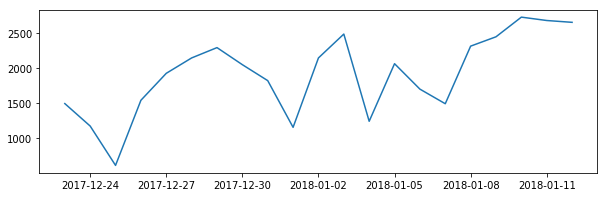

In [27]:
plt.figure(figsize = (10,3))
plt.plot(dates_SCP, counts_SCP);

# Challenge 5

In [28]:
day_ca_counts = defaultdict(dict)
for turnstile, rows in day_counts.items():
        for date, count in rows:
            new_key = (turnstile[0], turnstile[1], turnstile[3])
            day_ca_counts[new_key][date] = day_ca_counts[new_key].get(date,0) + count 
list(day_ca_counts.items())[0]

(('A002', 'R051', '59 ST'),
 {datetime.date(2017, 12, 23): 6654,
  datetime.date(2017, 12, 24): 5122,
  datetime.date(2017, 12, 25): 3036,
  datetime.date(2017, 12, 26): 11480,
  datetime.date(2017, 12, 27): 14014,
  datetime.date(2017, 12, 28): 13590,
  datetime.date(2017, 12, 29): 12907,
  datetime.date(2017, 12, 30): 7840,
  datetime.date(2017, 12, 31): 5908,
  datetime.date(2018, 1, 1): 4703,
  datetime.date(2018, 1, 2): 12747,
  datetime.date(2018, 1, 3): 13691,
  datetime.date(2018, 1, 4): 8369,
  datetime.date(2018, 1, 5): 11871,
  datetime.date(2018, 1, 6): 6855,
  datetime.date(2018, 1, 7): 5222,
  datetime.date(2018, 1, 8): 12904,
  datetime.date(2018, 1, 9): 13816,
  datetime.date(2018, 1, 10): 13692,
  datetime.date(2018, 1, 11): 13747,
  datetime.date(2018, 1, 12): 12551})

In [29]:
# Fortunately, order is maintained in the row dictionnary
# To be sure, let's change it to a list and order it
for ca, rows in day_ca_counts.items():
    day_ca_counts[ca] = sorted(rows.items())
list(day_ca_counts.items())[0]

(('A002', 'R051', '59 ST'),
 [(datetime.date(2017, 12, 23), 6654),
  (datetime.date(2017, 12, 24), 5122),
  (datetime.date(2017, 12, 25), 3036),
  (datetime.date(2017, 12, 26), 11480),
  (datetime.date(2017, 12, 27), 14014),
  (datetime.date(2017, 12, 28), 13590),
  (datetime.date(2017, 12, 29), 12907),
  (datetime.date(2017, 12, 30), 7840),
  (datetime.date(2017, 12, 31), 5908),
  (datetime.date(2018, 1, 1), 4703),
  (datetime.date(2018, 1, 2), 12747),
  (datetime.date(2018, 1, 3), 13691),
  (datetime.date(2018, 1, 4), 8369),
  (datetime.date(2018, 1, 5), 11871),
  (datetime.date(2018, 1, 6), 6855),
  (datetime.date(2018, 1, 7), 5222),
  (datetime.date(2018, 1, 8), 12904),
  (datetime.date(2018, 1, 9), 13816),
  (datetime.date(2018, 1, 10), 13692),
  (datetime.date(2018, 1, 11), 13747),
  (datetime.date(2018, 1, 12), 12551)])

# Challenge 6

In [30]:
day_station_counts = defaultdict(dict)
for turnstile, rows in day_counts.items():
        for date, count in rows:
            new_key = turnstile[3]
            day_station_counts[new_key][date] = day_station_counts[new_key].get(date,0) + count 
list(day_station_counts.items())[0]

('59 ST',
 {datetime.date(2017, 12, 23): 33214,
  datetime.date(2017, 12, 24): 25721,
  datetime.date(2017, 12, 25): 14017,
  datetime.date(2017, 12, 26): 56331,
  datetime.date(2017, 12, 27): 65196,
  datetime.date(2017, 12, 28): 63707,
  datetime.date(2017, 12, 29): 59202,
  datetime.date(2017, 12, 30): 35902,
  datetime.date(2017, 12, 31): 27069,
  datetime.date(2018, 1, 1): 19077,
  datetime.date(2018, 1, 2): 59122,
  datetime.date(2018, 1, 3): 65515,
  datetime.date(2018, 1, 4): 37344,
  datetime.date(2018, 1, 5): 56234,
  datetime.date(2018, 1, 6): 30309,
  datetime.date(2018, 1, 7): 22979,
  datetime.date(2018, 1, 8): 63847,
  datetime.date(2018, 1, 9): 67920,
  datetime.date(2018, 1, 10): 67075,
  datetime.date(2018, 1, 11): 67676,
  datetime.date(2018, 1, 12): 61718})

In [31]:
# let's change those lines to ordered list again.
for station, rows in day_station_counts.items():
    day_station_counts[station] = sorted(rows.items())
list(day_station_counts.items())[0]

('59 ST',
 [(datetime.date(2017, 12, 23), 33214),
  (datetime.date(2017, 12, 24), 25721),
  (datetime.date(2017, 12, 25), 14017),
  (datetime.date(2017, 12, 26), 56331),
  (datetime.date(2017, 12, 27), 65196),
  (datetime.date(2017, 12, 28), 63707),
  (datetime.date(2017, 12, 29), 59202),
  (datetime.date(2017, 12, 30), 35902),
  (datetime.date(2017, 12, 31), 27069),
  (datetime.date(2018, 1, 1), 19077),
  (datetime.date(2018, 1, 2), 59122),
  (datetime.date(2018, 1, 3), 65515),
  (datetime.date(2018, 1, 4), 37344),
  (datetime.date(2018, 1, 5), 56234),
  (datetime.date(2018, 1, 6), 30309),
  (datetime.date(2018, 1, 7), 22979),
  (datetime.date(2018, 1, 8), 63847),
  (datetime.date(2018, 1, 9), 67920),
  (datetime.date(2018, 1, 10), 67075),
  (datetime.date(2018, 1, 11), 67676),
  (datetime.date(2018, 1, 12), 61718)])

# Challenge 7

In [32]:
dates_STATION = []
counts_STATION = []
for date, count in day_station_counts['BEDFORD AV']:
    dates_STATION.append(date)
    counts_STATION.append(count)

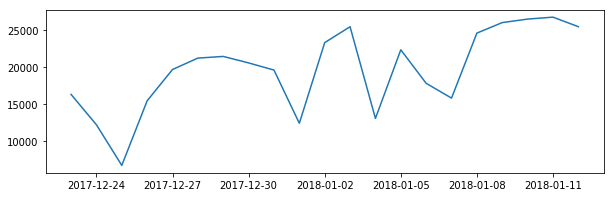

In [33]:
plt.figure(figsize = (10,3))
plt.plot(dates_STATION, counts_STATION);

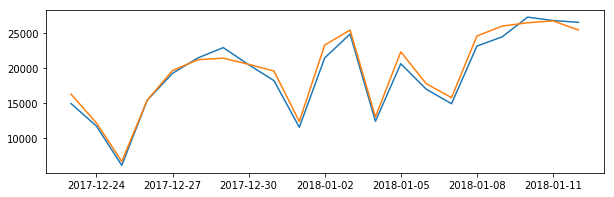

In [34]:
# this plot seems very similar, let's investigate whether it looks like an error
plt.figure(figsize = (10,3))
plt.plot(dates_SCP, [c*10 for c in counts_SCP])
plt.plot(dates_STATION, counts_STATION);

# Challenge 8

In [35]:
today = datetime.today()
today = today.date()
today.isocalendar()

(2018, 3, 2)

In [36]:
today.strftime("%A")

'Tuesday'

In [37]:
day_station_counts_exp = {station : [(date, date.strftime('%A'), count)
                                     for date, count in rows]
                         for station, rows in day_station_counts.items()}
list(day_station_counts_exp.items())[0]

('59 ST',
 [(datetime.date(2017, 12, 23), 'Saturday', 33214),
  (datetime.date(2017, 12, 24), 'Sunday', 25721),
  (datetime.date(2017, 12, 25), 'Monday', 14017),
  (datetime.date(2017, 12, 26), 'Tuesday', 56331),
  (datetime.date(2017, 12, 27), 'Wednesday', 65196),
  (datetime.date(2017, 12, 28), 'Thursday', 63707),
  (datetime.date(2017, 12, 29), 'Friday', 59202),
  (datetime.date(2017, 12, 30), 'Saturday', 35902),
  (datetime.date(2017, 12, 31), 'Sunday', 27069),
  (datetime.date(2018, 1, 1), 'Monday', 19077),
  (datetime.date(2018, 1, 2), 'Tuesday', 59122),
  (datetime.date(2018, 1, 3), 'Wednesday', 65515),
  (datetime.date(2018, 1, 4), 'Thursday', 37344),
  (datetime.date(2018, 1, 5), 'Friday', 56234),
  (datetime.date(2018, 1, 6), 'Saturday', 30309),
  (datetime.date(2018, 1, 7), 'Sunday', 22979),
  (datetime.date(2018, 1, 8), 'Monday', 63847),
  (datetime.date(2018, 1, 9), 'Tuesday', 67920),
  (datetime.date(2018, 1, 10), 'Wednesday', 67075),
  (datetime.date(2018, 1, 11), 'Thurs

In [38]:
week1 = []
week2 = []
week3 = []
labels = []

for date, weekday, count in day_station_counts_exp['BEDFORD AV'][:7]:
    week1.append(count)
    labels.append(weekday) # I only need the labels once 
    
for date, weekday, count in day_station_counts_exp['BEDFORD AV'][7:14]:
    week2.append(count)

for date, weekday, count in day_station_counts_exp['BEDFORD AV'][14:]:
    week3.append(count)

week1

[16302, 12201, 6718, 15440, 19665, 21204, 21429]

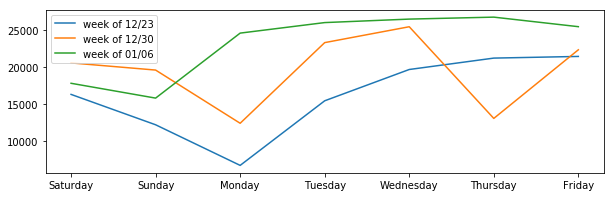

In [39]:
plt.figure(figsize = (10,3))
plt.plot(week1, label='week of 12/23')
plt.plot(week2, label='week of 12/30')
plt.plot(week3, label='week of 01/06')
plt.xticks(range(7), labels)
plt.legend();

This makes sense as we have dips in data on mondays 12/25 and 01/01

# Challenge 9

In [40]:
station_counts = defaultdict(int)
for station, rows in day_station_counts.items():
    for date, count in rows:
        station_counts[station] += count
list(station_counts.items())[0]     

('59 ST', 999175)

In [41]:
station_counts = sorted(station_counts.items(), key=lambda x:int(x[1]), reverse=True)
station_counts[:10]

[('34 ST-PENN STA', 2446439),
 ('GRD CNTRL-42 ST', 2091399),
 ('34 ST-HERALD SQ', 1742145),
 ('TIMES SQ-42 ST', 1514861),
 ('14 ST-UNION SQ', 1478449),
 ('23 ST', 1457509),
 ('42 ST-PORT AUTH', 1451074),
 ('FULTON ST', 1372279),
 ('86 ST', 1299674),
 ('125 ST', 1060978)]

This is not entirely accurate as 86 ST and 23 ST appear multiple times in the data set. To correct for that, we could roll up the data using a combination of LINE and LINE. 
This presents its own problems since there are line duplicates (ACE123 and 123ACE can both appear). we dealt with this issue by sorting the field in our project data set.

# Challenge 10

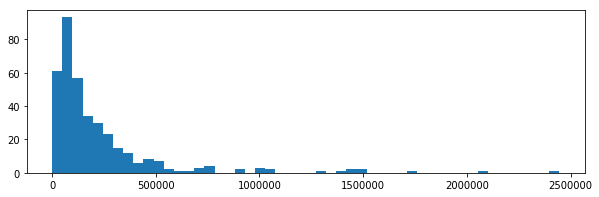

In [42]:
total_counts=[station[1] for station in station_counts]
plt.figure(figsize = (10,3))
plt.hist(total_counts, bins=50);

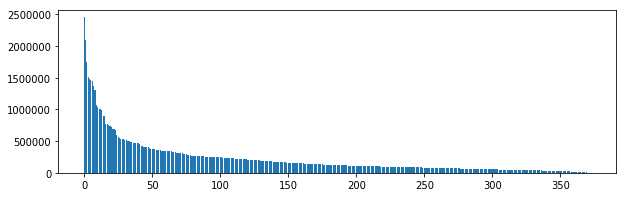

In [43]:
plt.figure(figsize = (10,3))
plt.bar(range(len(total_counts)), total_counts);